### Necessary imports 

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

### Setting Options

In [2]:
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)
pd.set_option("display.width",1000)

### Reading The Dataset 

In [3]:
data = pd.read_csv("sample_data_set_2 - Sheet1 (1).csv")

data.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


### Inspecting Dataset 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48293 entries, 0 to 48292
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          48293 non-null  object 
 1   App           48270 non-null  object 
 2   Ad Group      44300 non-null  object 
 3   State         48293 non-null  object 
 4   Revenue       48293 non-null  float64
 5   Ad Requests   48293 non-null  int64  
 6   Ad Responses  48293 non-null  int64  
 7   Fill Rate     48293 non-null  object 
 8   Impressions   48293 non-null  int64  
 9   Render Rate   48293 non-null  object 
 10  1st Clicks    48293 non-null  int64  
 11  2nd Clicks    48293 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.4+ MB


In [5]:
# Checking percentage of missing value 

round((data.isna().sum()/len(data))*100,2)

Date            0.00
App             0.05
Ad Group        8.27
State           0.00
Revenue         0.00
Ad Requests     0.00
Ad Responses    0.00
Fill Rate       0.00
Impressions     0.00
Render Rate     0.00
1st Clicks      0.00
2nd Clicks      0.00
dtype: float64

- Missing Values from Apps can be dropped right aways as they are negligible . 

- Ad Group Nulls can eaither be dropped or they can also be imputed . For now we will be moving ahead without removal of nulls 

In [6]:
# Top 5 Highest Revenue generating Apps 

data[["App" , "Revenue"]].sort_values(by=["Revenue"] , ascending = False).head(5)

,App,Revenue
2099,Bottle Shooting Game,42.39
3650,Traffic Bangalore: Check Fines,39.34
2084,Bottle Shooting Game,34.57
2001,Bottle Shooting Game,33.56
2122,Bottle Shooting Game,31.86


## Sanity Checks
- Checking The Sanity of few important interdependent variables 

In [7]:
# Ad responses > Ad Requests

data[data["Ad Requests"] < data["Ad Responses"]].head(5)

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
3801,11 Sep 2020,Traffic Bangalore: Check Fines,Traffic bangalore_Admob_New Banner,Karnataka,30.93,139252,139445,99.9%,105400,75.59%,1264,0
8508,06 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Delhi,2.00,20179,20180,100%,19645,97.3%,1998,2000
8838,08 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,West Bengal,1.48,17321,17322,100%,16947,97.8%,1487,1483
9119,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Telangana,1.47,15336,15337,100%,14957,97.5%,1469,1473
10103,07 Sep 2020,Indian Train Simulator 2018,Rooter_Cricket,Bihar,1.14,11385,11387,100%,10992,96.5%,1143,1143


In [8]:
len(data[data["Ad Requests"] < data["Ad Responses"]])

41

Insight :- Here the number of Ad-Response is greater than number of Ad-Requests , 41 such instances can be observed . This is impratical and one of the discrepancie in given data . 

In [9]:
# Impression < 1st Click

data[data["1st Clicks"] > data["Impressions"]].head()


,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
976,10 Sep 2020,Callbreak Multiplayer,Dhani Backfill,Unresolved,0.0,1245335,0,99.6%,0,0.00%,3,0
1993,08 Sep 2020,Bottle Shooting Game,RC_TN_ENG,Unresolved,0.0,428385,7,100%,2,28.6%,4,2
2107,10 Sep 2020,Bottle Shooting Game,Dhani Backfill,Unresolved,0.0,407421,0,99.9%,0,0.00%,4,2
2120,10 Sep 2020,Bottle Shooting Game,Danishsolo_Kan,Unresolved,0.0,407421,7,99.9%,3,42.9%,4,0
2863,12 Sep 2020,World Cricket Championship 2,logo with name,Telangana,0.0,224281,1,99.9%,1,100%,2,0


In [10]:
len(data[data["1st Clicks"] > data["Impressions"]])

390

Insight :- Here the number of 1st Clicks is greater than number of Impressions created , 390 such instances can be observed . This is impratical and one of the discrepancie in given data .

In [11]:
# 2nd Click > 1st Click 

data[data["1st Clicks"] < data["2nd Clicks"]].head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
1402,08 Sep 2020,Callbreak Multiplayer,Rooter_Callbreak,Assam,2.88,620174,554389,100%,506763,91.4%,5759,5760
1436,10 Sep 2020,Callbreak Multiplayer,revshare,Assam,0.00,612781,73539,99.9%,56483,76.81%,511,512
1625,08 Sep 2020,Callbreak Multiplayer,Rooter_Callbreak,Odisha,2.84,511647,470593,100%,433696,92.2%,5679,5690
1695,10 Sep 2020,Callbreak Multiplayer,Rooter_Callbreak,Odisha,1.90,498868,353690,100%,324784,91.8%,3789,3793
2057,07 Sep 2020,Mindi Offline,Rooter_NonCricket,Gujarat,0.19,417712,32047,100%,31506,98.3%,128,129


In [12]:
len(data[data["1st Clicks"] < data["2nd Clicks"]])

545

Insight :- Here the number of 1st Clicks is greater than number of Impressions created , 545 such instances can be observed . This is impratical and one of the discrepancie in given data .

Ad Group seems to have certain discrapencies as well , like 355.786 etc categories .

- Fill rate is percentage of Ad Responses on Ad Requests . Now the data in fill rate column is rather suspecious . 
   - Hence creating another variable named True Fill Rate , to check its credability .  

In [13]:
data["True Fill Rate"] = round( ( data["Ad Responses"]/data["Ad Requests"] )*100, 2)

data.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks,True Fill Rate
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0,99.85
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2,0.00
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2,0.00
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2,0.00
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0,99.88


In [14]:
# Comparing the True Fill rate with Given Fill Rate to check the Credability of data 

data[["Fill Rate" , "True Fill Rate"]].head(50)

,Fill Rate,True Fill Rate
0,99.9%,99.85
1,99.9%,0.00
2,99.9%,0.00
3,99.9%,0.00
4,99.9%,99.88
5,99.9%,0.00
6,99.9%,0.00
7,99.9%,0.00
8,100%,6.63
9,100%,6.65


Insight :- The Fill Rate Data is irrerailbe . We can see that the by comparing it with True Fill rate .


In [15]:
data[["Fill Rate" , "True Fill Rate"]][data["True Fill Rate"]<10].head(50)

,Fill Rate,True Fill Rate
1,99.9%,0.00
2,99.9%,0.00
3,99.9%,0.00
5,99.9%,0.00
6,99.9%,0.00
7,99.9%,0.00
8,100%,6.63
9,100%,6.65
10,100%,6.64
11,100%,6.64


Insight :- There is an interesting insight that can be observed here . Most of the data avaliable in fill rate column is incorrect . Intrestingly the ,incorrect data inputted in Fill Rate column appears to be eaither 99.99% or 100% (Actual) . In large number of instances where True Fillrate is less than 10% the Fill rate appears to be eaithe 99% or 100%

## Analysis 

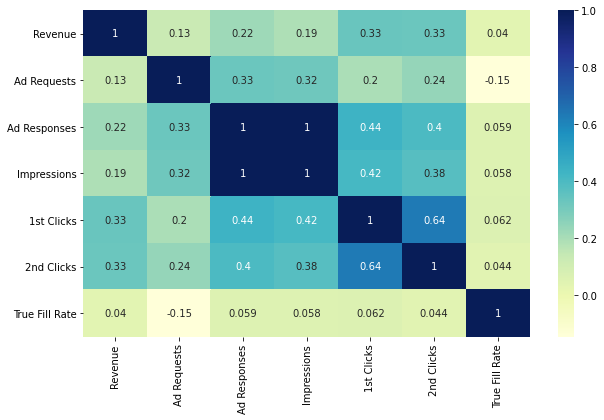

In [16]:
plt.figure(figsize = (10,6))

sns.heatmap(data.corr() , annot = True , cmap="YlGnBu")

plt.show()

Insight :- Intrestingly Revenue is not very highly corelated with Ad requests , but rather it has good corelation with the clicks (1st and 2nd). 

Hence to increase the overall revinue of the app emphesis should be given on improving the number of Ad - clicks. 

### Important Apps for GG
- The Apps who has High Ad-Request but Low Ad-Response (i.e True Fill Rate) are the Apps which holds high importance for GG . As these are the Apps who has potential which is being unutilised . GG can get the most out of these apps by harvesting the potential .

In [17]:
# Low Fill Rate + 0 Revenue + High Ad requests 

data[["App"]][(data["True Fill Rate"] < 10) & (data["Ad Requests"] > 100000) & (data["Revenue"] == 0)].value_counts()

App                         
Callbreak Multiplayer           1870
World Cricket Championship 2     773
Bottle Shooting Game             423
(SDK X) Cricket Mazza            135
Mindi Offline                     97
Calculator vault                   6
dtype: int64

So these ar ethe Apps with High amount of ad requests but very low ad response . These apps should be considered as Tier-1 apps as they generate ad requests which are mostly unfulfulled . In eyes of GG these aps should be focused upon as they have huge potential . 

Callbreak Multiplayer , World Cricket Championship 2 , Bottle Shooting Game , (SDK X) Cricket Mazza , Mindi Offline , Calculator vault

In [18]:
# 0 Fill rate + 0 Revenue + Very High Ad Requests 

data[["App"]][(data["True Fill Rate"] == 0 ) & (data["Ad Requests"] > 1000000) & (data["Revenue"] == 0.0)].value_counts()

App                   
Callbreak Multiplayer     767
(SDK X) Cricket Mazza      10
dtype: int64

**Insight** :- Specifically These 2 apps are or huge importance for GG . As lacks of ad-reruests are generated wilth 0% fill rate and 0 revinue as well . This is the situation where GG can utilize its techniques for optimim results 

In [19]:
data[["App" , "Ad Requests" , "Ad Responses"]][(data["True Fill Rate"] == 0 ) & (data["Ad Requests"] > 1000000) & (data["Revenue"] == 0.0)]

,App,Ad Requests,Ad Responses
1,(SDK X) Cricket Mazza,3932330,119
2,(SDK X) Cricket Mazza,3932330,96
3,(SDK X) Cricket Mazza,3932330,111
5,(SDK X) Cricket Mazza,3839002,101
6,(SDK X) Cricket Mazza,3839002,126
...,...,...,...
1194,Callbreak Multiplayer,1185486,2
1195,Callbreak Multiplayer,1185486,1
1196,Callbreak Multiplayer,1185486,2
1197,Callbreak Multiplayer,1185486,34


### Inspecting Ad-Groups

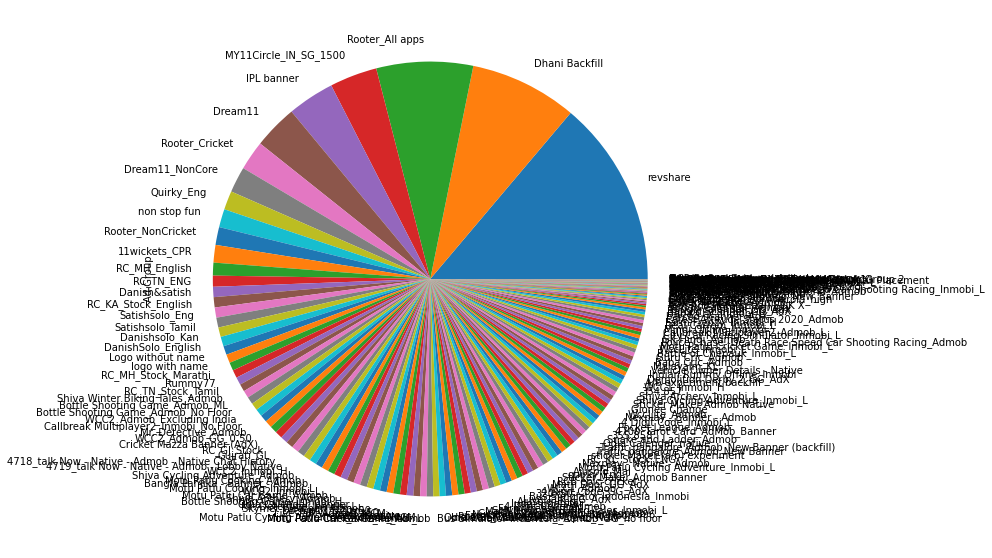

In [20]:
# Inspecting Major Ad-Groups

plt.figure(figsize=(20,10))

data["Ad Group"].value_counts(normalize = True).plot.pie()

plt.show()

Such Ad Groups which are not clicked upon evenafter successful impression can be labeled under Opportunity loss ad groups . 

Lets find them by checking High number of Impressions but low number of Clicks 

In [21]:
# Creating a variable which will display the rate of Impressions getting converted into clicks 

data["Impression to click"] = round((data["1st Clicks"]/data["Impressions"])*100,2)

In [22]:
# Top 5 App Groups with Very Low impression to click rate . 

data[["Ad Group"]][data["Impression to click"]<5].value_counts().head()

Ad Group             
revshare                 3621
Dhani Backfill           2163
Rooter_All apps          2103
MY11Circle_IN_SG_1500     838
IPL banner                838
dtype: int64

These are the apps which have very low impression rate , meaning low clicks on ad after high impressions .
They are these apps can be tearmed as missed opportunity Ad-Groups

In [23]:
# Specifically checking ad Groups with very high impressions and very low clicks 

data[["Ad Group"]][(data["Impressions"] > 1000000) & (data["1st Clicks"] < 7000)].value_counts()

Ad Group                  
Cricket Mazza Banner (AdX)    12
Dream11_NonCore                5
dtype: int64

**Insight** :- Heavy Amount of missed opportunity can be seen in these 2 Ad Groups . as they explecelty not only have Humangous impressions but very very low clicks . Although They are low on volume they are equally crucial  

Conclusion Regrading Ad group :-  revshare , Dhani Backfill , Rooter_All apps , MY11Circle_IN_SG_1500 , IPL banner , Cricket Mazza Banner (AdX) , Dream11_NonCore . Are the ad groups which are causing an opportunity loss for the app . 

To Mitegate the situation we must improve on impression conversion rate . To do so various techniques can be implimented one of them is to improve the presentation or Ad , quality of app , Impact of the ad displayed etc . 